In [1]:
import numpy as np
import pandas as pd

In [2]:
STOCK_CODE = '233740'

In [3]:
FILE_NAME = f'./data/{STOCK_CODE}.dataset.csv'
df_stock = pd.read_csv(FILE_NAME, header=0, index_col=0,encoding='utf-8')

In [4]:
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.head()

,date,closed_v,diff,open,max,min,closed,vol_index
0,2015-12-18,10710,3.678606,-0.968054,4.692082,-0.635386,4.692082,1.841150
1,2015-12-21,10720,0.093371,-0.140056,1.215521,-0.233754,0.233754,1.274858
2,2015-12-22,10495,-2.098881,0.186567,0.093110,-2.700186,-2.281192,1.374974
3,2015-12-23,10425,-0.666984,0.381134,0.949217,-1.139060,-1.044139,2.532341
4,2015-12-24,10295,-1.247002,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [5]:
df_dataset = df_stock.drop('diff', axis='columns')
df_dataset.head()

,date,closed_v,open,max,min,closed,vol_index
0,2015-12-18,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150
1,2015-12-21,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858
2,2015-12-22,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974
3,2015-12-23,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341
4,2015-12-24,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [6]:
df_dataset['date'] = pd.to_datetime(df_dataset['date'],format='%Y%m%d')
df_dataset = df_dataset.set_index('date')

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1650 entries, 2015-12-18 to 2022-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   closed_v   1650 non-null   int64  
 1   open       1650 non-null   float64
 2   max        1650 non-null   float64
 3   min        1650 non-null   float64
 4   closed     1650 non-null   float64
 5   vol_index  1650 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 90.2 KB


In [7]:
import datetime 

train = df_dataset.loc[:datetime.datetime(2022,5,31),:]
test = df_dataset.loc[datetime.datetime(2022,6,1):,:]
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1584 entries, 2015-12-18 to 2022-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   closed_v   1584 non-null   int64  
 1   open       1584 non-null   float64
 2   max        1584 non-null   float64
 3   min        1584 non-null   float64
 4   closed     1584 non-null   float64
 5   vol_index  1584 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 86.6 KB
None


,closed_v,open,max,min,closed,vol_index
date,,,,,,
2015-12-18,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150
2015-12-21,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858
2015-12-22,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974
2015-12-23,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341
2015-12-24,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [8]:
train = train.reset_index().rename(columns={'closed_v':'y'})
train['ds'] = pd.to_datetime(train['date'].astype(str))
train = train.drop('date',axis=1)
train.head()

,y,open,max,min,closed,vol_index,ds
0,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150,2015-12-18
1,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858,2015-12-21
2,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974,2015-12-22
3,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341,2015-12-23
4,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790,2015-12-24


In [9]:
test = test.reset_index().rename(columns={'closed_v':'y'})
test['ds'] = pd.to_datetime(test['date'].astype(str))
test = test.drop('date',axis=1)
test.head()

,y,open,max,min,closed,vol_index,ds
0,10955,-1.034638,0.636364,-1.000000,-0.409091,6.825550,2022-06-02
1,10900,2.145139,0.178731,-2.993744,-2.591600,8.486698,2022-06-03
2,10255,-0.688073,0.230947,-5.404157,-5.265589,10.629725,2022-06-07
3,10325,1.170161,1.253012,-1.253012,-0.481928,9.217295,2022-06-08
4,10490,-0.677966,2.291565,-1.950268,2.291565,7.357790,2022-06-09


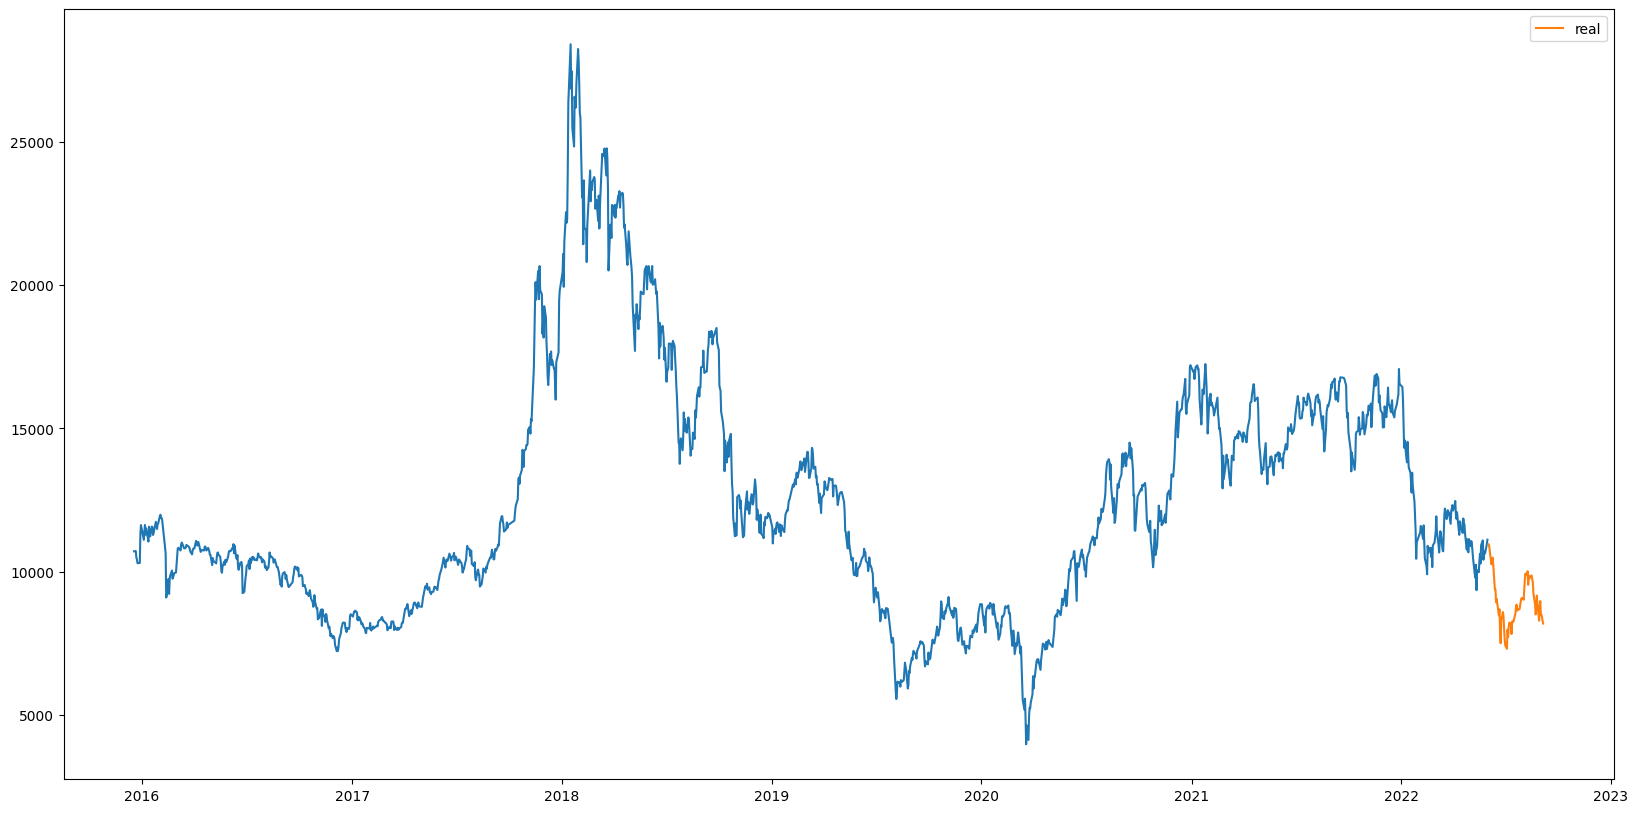

In [119]:
plt.figure(figsize=(20,10))
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'], test['y'], label="real")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

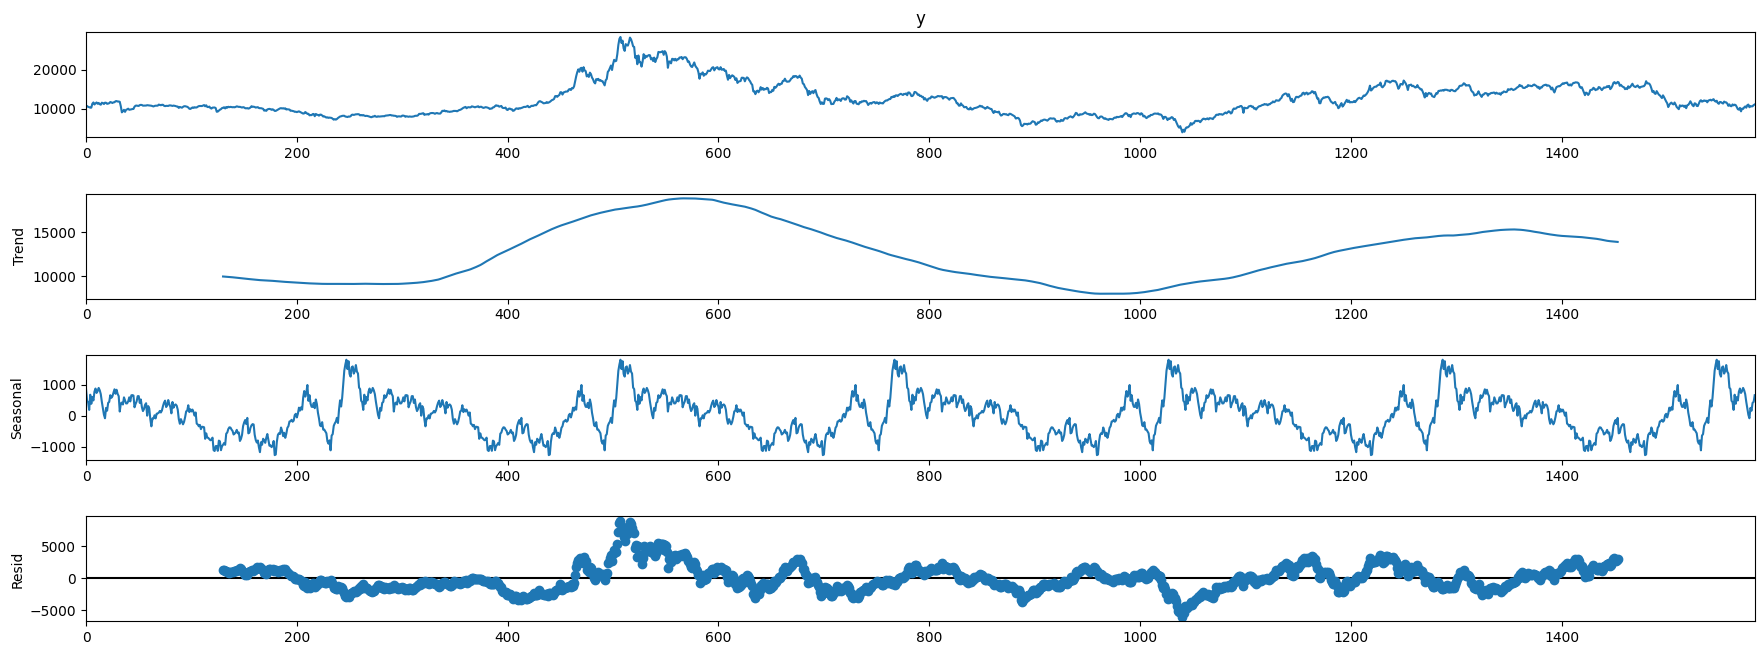

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train["y"], model="additive", period=5*52) # 5일 * 52주
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,7)
plt.show()

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


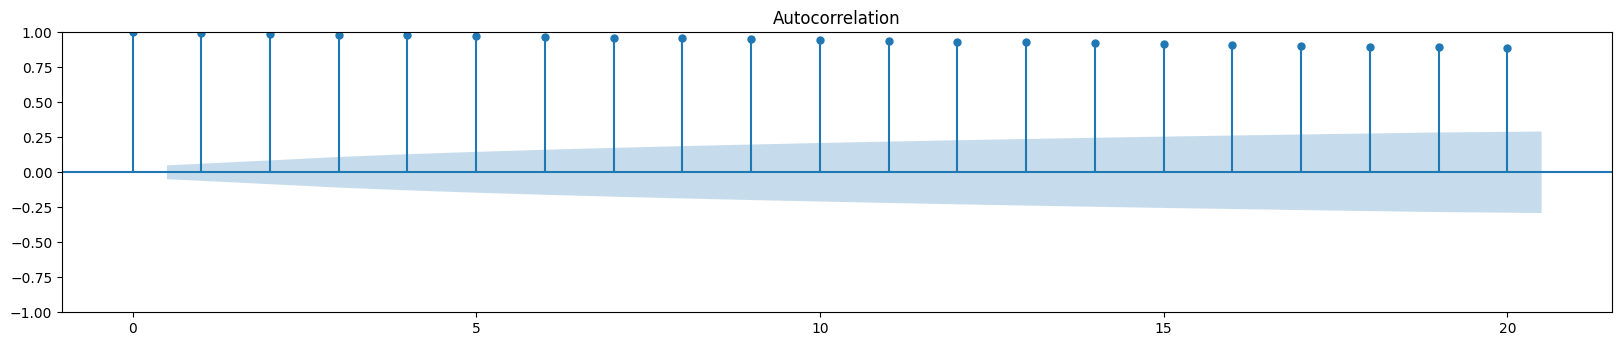

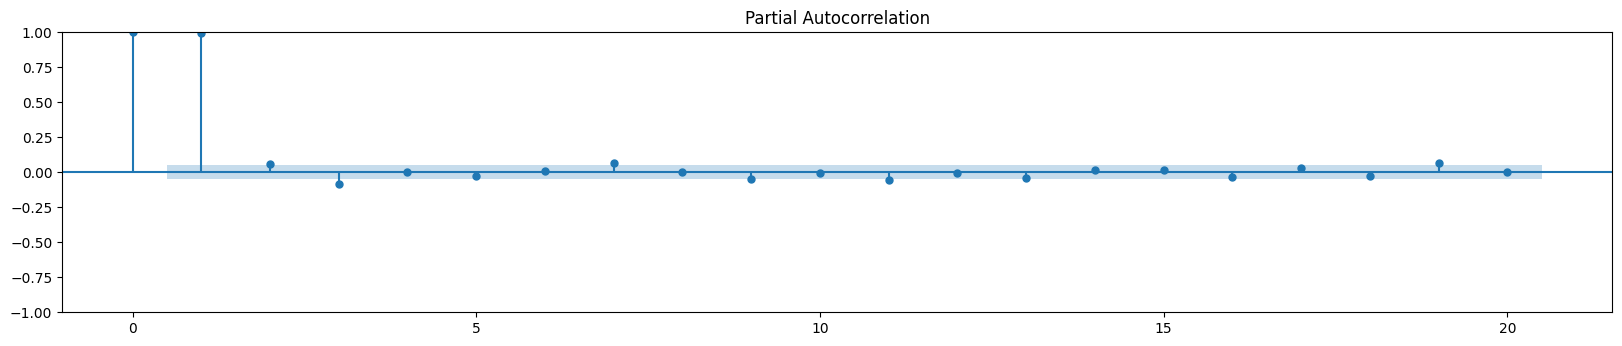

In [22]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train["y"], lags=20, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train["y"], lags=20, ax=ax1)

## ARIMA 모델 설정

ARIMA 모델의 생성 전 변수를 p, d, q에 결정

In [32]:
import itertools
from tqdm import tqdm

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(train["y"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

print(pdq)
print(params)
print(aic)

  0%|                                                    | 0/18 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 22%|█████████▊                                  | 4/18 [00:00<00:00, 34.68it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48128D+00    |proj g|=  1.46381D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.464D-06   7.481D+00
  F =   7.4812837192324260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 44%|███████████████████▌                        | 8/18 [00:00<00:00, 15.29it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47959D+00    |proj g|=  6.52261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.512D-06   7.480D+00
  F =   7.4795927745836730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03


 61%|██████████████████████████▎                | 11/18 [00:01<00:00,  9.22it/s]


At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03

At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03


 72%|███████████████████████████████            | 13/18 [00:01<00:00,  5.96it/s]


At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 83%|███████████████████████████████████▊       | 15/18 [00:01<00:00,  6.96it/s] This problem is unconstrained.



At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iter

 This problem is unconstrained.
 94%|████████████████████████████████████████▌  | 17/18 [00:02<00:00,  5.40it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|███████████████████████████████████████████| 18/18 [00:03<00:00,  3.25it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

100%|███████████████████████████████████████████| 18/18 [00:04<00:00,  4.42it/s]

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5)]
[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5)]
[23702.71, 23699.99, 23694.76, 23696.64, 23696.99, 23698.17, 23699.35, 23695.42, 23696.1, 23697.79, 23698.76, 23699.03, 23694.19, 23695.99, 23697.67, 23699.6, 23693.52, 23693.46]


In [43]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]

print(optimal)

model_opt = ARIMA(train["y"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

[((2, 1, 5), 23693.46)]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1584
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -11838.730
Date:                Tue, 06 Sep 2022   AIC                          23693.460
Time:                        21:53:15   BIC                          23736.397
Sample:                             0   HQIC                         23709.413
                               - 1584                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0828      0.039     28.015      0.000       1.007       1.159
ar.L2         -0.8911      0.039    -22.852      0.000      -0.968      -0.815
ma.L1         -1.1391      0.040    -28.789      0.000      -1.217      -1.062
ma.L2          1.0212      0.045     22.551      0.000       0.932       1.110
ma.L3         -0.1314      0.029     -4.597      0.000      -0.187      -0.075
ma.L4          0.0909      0.025      3.700      0.000       0.043       0.139
ma.L5         -0.0425      0.017     -2.549      0.011      -0.075      -0.010
sigma2      1.851e+05   3610.591     51.257      0.000    1.78e+05    1.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2055.65
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.24
Prob(H) (two-sided):                  0.27   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

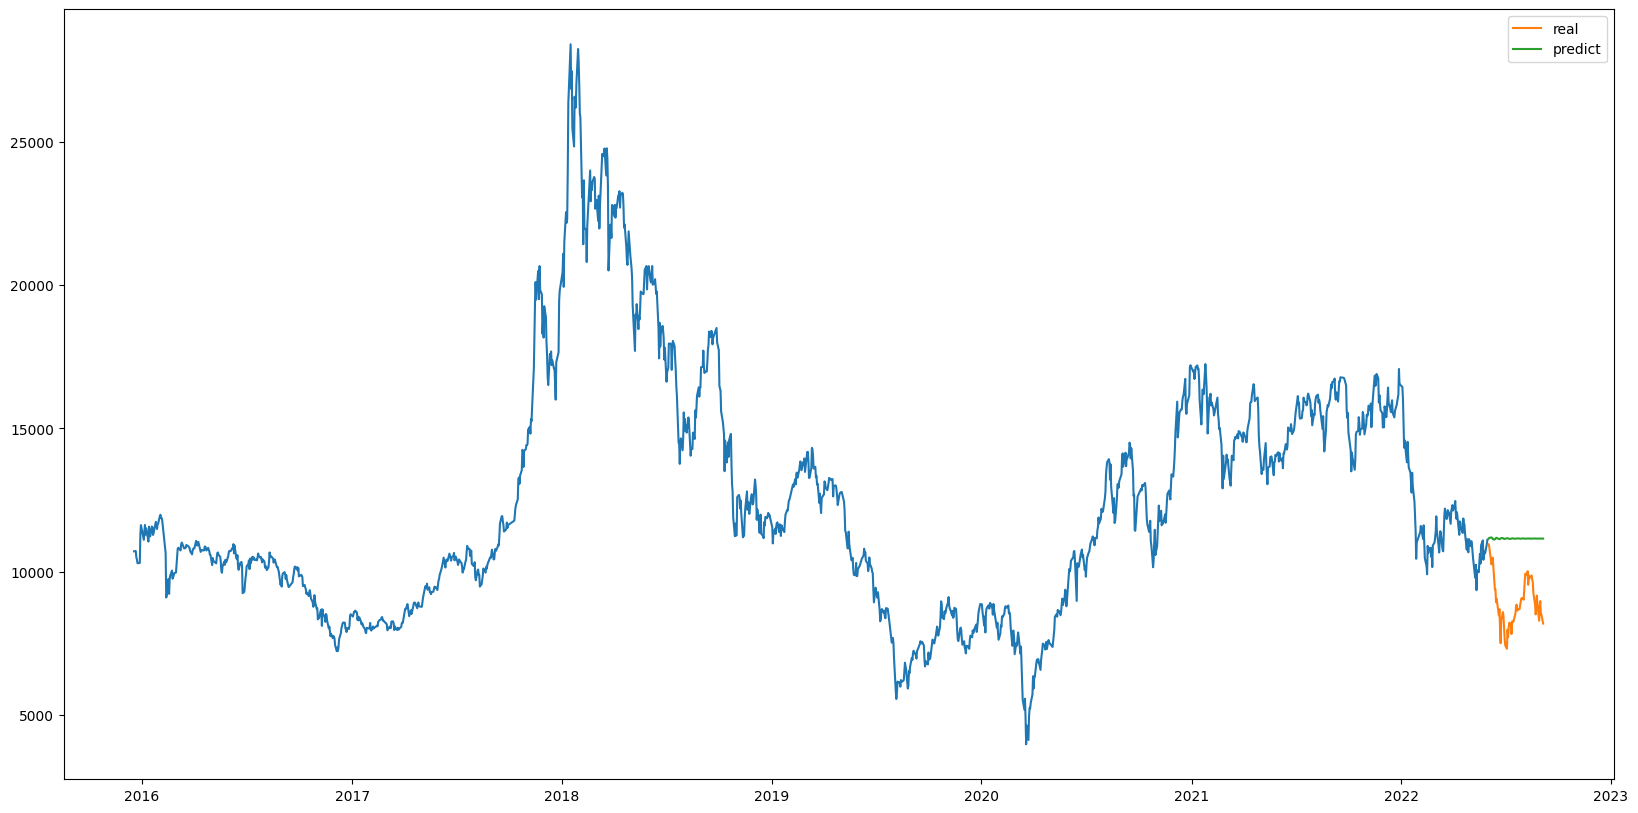

In [115]:
model = ARIMA(train["y"], order=optimal[0][0])
model_fit = model.fit()
forecast = model_fit.forecast(test.shape[0])

forecast = pd.DataFrame(forecast)
forecast.reset_index(drop=True, inplace=True)
forecast = pd.concat([test, forecast.reindex(test.index)], axis=1)
forecast

plt.figure(figsize=(20,10))
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'], test['y'], label="real")
plt.plot(forecast['ds'],forecast['predicted_mean'], label="predict")
plt.legend()
plt.show()

## SARIMAX: 260 (5일 * 52주 - 1년 중 영업일)

In [121]:
p = range(0,3)
d = range(1,2)
q = range(0,6)
m = 5 * 52 # 1년 영업일 기준
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1], x[2], m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(train["y"], order=(i), season_order = (j))
                model_fit = model.fit()
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

  0%|                                                   | 0/324 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
  2%|▊                                          | 6/324 [00:00<00:05, 55.57it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48128D+00    |proj g|=  1.46381D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.464D-06   7.481D+00
  F =   7.4812837192324260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
  4%|█▌                                        | 12/324 [00:00<00:06, 51.98it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
  6%|██▎                                       | 18/324 [00:00<00:05, 51.56it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48128D+00    |proj g|=  1.46381D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.464D-06   7.481D+00
  F =   7.4812837192324260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
  7%|███                                       | 24/324 [00:00<00:07, 41.46it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.548D-06   7.480D+00
  F =   7.4797963860721586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47980D+00    |proj g|=  3.55709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
  9%|███▊                                      | 29/324 [00:00<00:08, 36.09it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.548D-06   7.480D+00
  F =   7.4797963860721586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47980D+00    |proj g|=  3.55709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 10%|████▎                                     | 33/324 [00:00<00:08, 33.28it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 11%|████▊                                     | 37/324 [00:01<00:09, 31.04it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.548D-06   7.480D+00
  F =   7.4797963860721586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47980D+00    |proj g|=  3.55709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 13%|█████▎                                    | 41/324 [00:01<00:10, 26.22it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   4.858D-06   7.478D+00
  F =   7.4775123581412064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47753D+00    |proj g|=  6.34809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 14%|█████▋                                    | 44/324 [00:01<00:11, 24.78it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   4.858D-06   7.478D+00
  F =   7.4775123581412064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47753D+00    |proj g|=  6.34809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 15%|██████                                    | 47/324 [00:01<00:11, 23.59it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 15%|██████▍                                   | 50/324 [00:01<00:11, 22.97it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47753D+00    |proj g|=  6.34809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   4.858D-06   7.478D+00
  F =   7.4775123581412064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 16%|██████▊                                   | 53/324 [00:01<00:11, 22.76it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   4.858D-06   7.478D+00
  F =   7.4775123581412064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47753D+00    |proj g|=  6.34809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 17%|███████▎                                  | 56/324 [00:01<00:13, 20.59it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 18%|███████▋                                  | 59/324 [00:02<00:16, 16.39it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 19%|███████▉                                  | 61/324 [00:02<00:17, 14.95it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 19%|████████▏                                 | 63/324 [00:02<00:18, 13.92it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 20%|████████▍                                 | 65/324 [00:02<00:19, 13.09it/s] This problem is unconstrained.
 This problem is unconstrained.
 21%|████████▋                                 | 67/324 [00:02<00:20, 12.63it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 21%|████████▉                                 | 69/324 [00:03<00:20, 12.20it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 22%|█████████▏                                | 71/324 [00:03<00:21, 11.87it/s] This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   2.008D-06   7.477D+00
  F =   7.4774746926395546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 23%|█████████▍                                | 73/324 [00:03<00:21, 11.43it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 23%|█████████▋                                | 75/324 [00:03<00:23, 10.58it/s] This problem is unconstrained.
 This problem is unconstrained.
 24%|█████████▉                                | 77/324 [00:03<00:24, 10.06it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 24%|██████████▏                               | 79/324 [00:04<00:24,  9.81it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 25%|██████████▎                               | 80/324 [00:04<00:25,  9.42it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 25%|██████████▋                               | 82/324 [00:04<00:28,  8.49it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 26%|██████████▉                               | 84/324 [00:04<00:29,  8.09it/s]

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 27%|███████████▏                              | 86/324 [00:05<00:29,  8.16it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 27%|███████████▍                              | 88/324 [00:05<00:27,  8.50it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 28%|███████████▋                              | 90/324 [00:05<00:26,  8.76it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47697D+00    |proj g|=  3.45392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 28%|███████████▉                              | 92/324 [00:05<00:28,  8.28it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   5.047D-06   7.477D+00
  F =   7.4769533505838490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 29%|████████████                              | 93/324 [00:05<00:30,  7.54it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 29%|████████████▎                             | 95/324 [00:06<00:30,  7.50it/s]

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 30%|████████████▌                             | 97/324 [00:06<00:31,  7.27it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 30%|████████████▋                             | 98/324 [00:06<00:31,  7.20it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 31%|████████████▋                            | 100/324 [00:06<00:30,  7.41it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 31%|████████████▉                            | 102/324 [00:07<00:29,  7.49it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 32%|█████████████                            | 103/324 [00:07<00:29,  7.51it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 32%|█████████████▎                           | 105/324 [00:07<00:28,  7.61it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 33%|█████████████▌                           | 107/324 [00:07<00:27,  7.90it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 34%|█████████████▊                           | 109/324 [00:08<00:29,  7.33it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      5      1     0     0   9.654D-06   7.477D+00
  F =   7.4766964863162739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47670D+00    |proj g|=  2.30376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 35%|██████████████▎                          | 113/324 [00:08<00:14, 14.19it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 36%|██████████████▋                          | 116/324 [00:08<00:11, 17.68it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.512D-06   7.480D+00
  F =   7.4795927745836730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47959D+00    |proj g|=  6.52261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 37%|███████████████▏                         | 120/324 [00:08<00:09, 21.59it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47959D+00    |proj g|=  6.52261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.512D-06   7.480D+00
  F =   7.4795927745836730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 38%|███████████████▋                         | 124/324 [00:08<00:08, 24.22it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 39%|████████████████                         | 127/324 [00:08<00:07, 25.01it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.512D-06   7.480D+00
  F =   7.4795927745836730     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47959D+00    |proj g|=  6.52261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 40%|████████████████▍                        | 130/324 [00:09<00:11, 16.51it/s] This problem is unconstrained.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS

 This problem is unconstrained.
 This problem is unconstrained.
 41%|████████████████▊                        | 133/324 [00:09<00:13, 14.10it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 42%|█████████████████                        | 135/324 [00:09<00:14, 13.03it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 42%|█████████████████▎                       | 137/324 [00:09<00:14, 12.67it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 43%|█████████████████▌                       | 139/324 [00:09<00:15, 12.18it/s] This problem is unconstrained.
 This problem is unconstrained.
 44%|█████████████████▊                       | 141/324 [00:10<00:15, 11.50it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 44%|██████████████████                       | 143/324 [00:10<00:15, 11.72it/s] This problem is unconstrained.



At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 45%|██████████████████▎                      | 145/324 [00:10<00:15, 11.85it/s] This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47787D+00    |proj g|=  1.02730D-02

At iterate    5    f=  7.47774D+00    |proj g|=  2.19146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.586D-06   7.478D+00
  F =   7.4777219086393263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterat


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 45%|██████████████████▌                      | 147/324 [00:10<00:20,  8.62it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 46%|██████████████████▊                      | 149/324 [00:11<00:25,  6.79it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 46%|██████████████████▉                      | 150/324 [00:11<00:27,  6.22it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 47%|███████████████████                      | 151/324 [00:11<00:28,  6.02it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 47%|███████████████████▏                     | 152/324 [00:11<00:31,  5.48it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 47%|███████████████████▎                     | 153/324 [00:12<00:31,  5.39it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 48%|███████████████████▍                     | 154/324 [00:12<00:31,  5.34it/s] This problem is unconstrained.



At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 48%|███████████████████▌                     | 155/324 [00:12<00:31,  5.38it/s] This problem is unconstrained.



At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 48%|███████████████████▋                     | 156/324 [00:12<00:31,  5.26it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 48%|███████████████████▊                     | 157/324 [00:12<00:31,  5.29it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 49%|███████████████████▉                     | 158/324 [00:13<00:33,  4.97it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 49%|████████████████████                     | 159/324 [00:13<00:33,  5.00it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 49%|████████████████████▏                    | 160/324 [00:13<00:31,  5.13it/s] This problem is unconstrained.



At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 50%|████████████████████▎                    | 161/324 [00:13<00:31,  5.23it/s] This problem is unconstrained.



At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 50%|████████████████████▌                    | 162/324 [00:13<00:30,  5.23it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     0     0   1.029D-05   7.477D+00
  F =   7.4773045902613857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47736D+00    |proj g|=  5.22583D-03

At iterate    5    f=  7.47735D+00    |proj g|=  9.03412D-04

At iterate   10    f=  7.47731D+00    |proj g|=  2.52663D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 50%|████████████████████▋                    | 163/324 [00:13<00:30,  5.27it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03


 51%|████████████████████▊                    | 164/324 [00:14<00:35,  4.51it/s]


At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03


 This problem is unconstrained.
 51%|████████████████████▉                    | 165/324 [00:14<00:38,  4.14it/s]


At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03



 This problem is unconstrained.
 51%|█████████████████████                    | 166/324 [00:14<00:40,  3.86it/s]

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 52%|█████████████████████▏                   | 167/324 [00:15<00:42,  3.68it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 52%|█████████████████████▎                   | 168/324 [00:15<00:43,  3.57it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03


 52%|█████████████████████▍                   | 169/324 [00:15<00:44,  3.51it/s]


At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03


 This problem is unconstrained.
 52%|█████████████████████▌                   | 170/324 [00:16<00:44,  3.50it/s]


At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03



 This problem is unconstrained.
 53%|█████████████████████▋                   | 171/324 [00:16<00:44,  3.42it/s]

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 53%|█████████████████████▊                   | 172/324 [00:16<00:44,  3.43it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 53%|█████████████████████▉                   | 173/324 [00:16<00:44,  3.38it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 54%|██████████████████████                   | 174/324 [00:17<00:44,  3.34it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03


 54%|██████████████████████▏                  | 175/324 [00:17<00:44,  3.34it/s]


At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03


 This problem is unconstrained.
 54%|██████████████████████▎                  | 176/324 [00:17<00:44,  3.32it/s]


At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03

At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04


 This problem is unconstrained.
 55%|██████████████████████▍                  | 177/324 [00:18<00:43,  3.38it/s]


At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47752D+00    |proj g|=  9.74942D-03


 This problem is unconstrained.
 55%|██████████████████████▌                  | 178/324 [00:18<00:42,  3.43it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 55%|██████████████████████▋                  | 179/324 [00:18<00:41,  3.46it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 56%|██████████████████████▊                  | 180/324 [00:19<00:41,  3.47it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 56%|██████████████████████▉                  | 181/324 [00:19<00:41,  3.48it/s]


At iterate    5    f=  7.47747D+00    |proj g|=  9.51519D-04

At iterate   10    f=  7.47731D+00    |proj g|=  7.18700D-03

At iterate   15    f=  7.47722D+00    |proj g|=  2.02541D-03

At iterate   20    f=  7.47721D+00    |proj g|=  1.70425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.704D-05   7.477D+00
  F =   7.4772073509438126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|███████████████████████                  | 182/324 [00:19<00:44,  3.17it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 56%|███████████████████████▏                 | 183/324 [00:20<00:46,  3.00it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|███████████████████████▎                 | 184/324 [00:20<00:48,  2.91it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|███████████████████████▍                 | 185/324 [00:20<00:49,  2.83it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|███████████████████████▌                 | 186/324 [00:21<00:49,  2.77it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|███████████████████████▋                 | 187/324 [00:21<00:49,  2.74it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|███████████████████████▊                 | 188/324 [00:21<00:50,  2.72it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 58%|███████████████████████▉                 | 189/324 [00:22<00:49,  2.70it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|████████████████████████                 | 190/324 [00:22<00:49,  2.70it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03

At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|████████████████████████▏                | 191/324 [00:23<00:57,  2.32it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|████████████████████████▎                | 192/324 [00:23<00:54,  2.41it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|████████████████████████▍                | 193/324 [00:24<00:53,  2.47it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|████████████████████████▌                | 194/324 [00:24<00:51,  2.52it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|████████████████████████▋                | 195/324 [00:24<00:50,  2.56it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|████████████████████████▊                | 196/324 [00:25<00:49,  2.61it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 61%|████████████████████████▉                | 197/324 [00:25<00:49,  2.56it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 61%|█████████████████████████                | 198/324 [00:25<00:48,  2.59it/s] This problem is unconstrained.



At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47703D+00    |proj g|=  4.19982D-03

At iterate    5    f=  7.47695D+00    |proj g|=  4.07637D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 61%|█████████████████████████▏               | 199/324 [00:26<00:48,  2.60it/s]


At iterate   10    f=  7.47688D+00    |proj g|=  3.36517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     31      1     0     0   3.365D-05   7.477D+00
  F =   7.4768813700586252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03

At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03


 This problem is unconstrained.
 62%|█████████████████████████▎               | 200/324 [00:26<00:44,  2.80it/s]


At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 62%|█████████████████████████▍               | 201/324 [00:26<00:41,  2.95it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 62%|█████████████████████████▌               | 202/324 [00:27<00:39,  3.09it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 63%|█████████████████████████▋               | 203/324 [00:27<00:37,  3.21it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 63%|█████████████████████████▊               | 204/324 [00:27<00:36,  3.28it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 63%|█████████████████████████▉               | 205/324 [00:28<00:35,  3.35it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 64%|██████████████████████████               | 206/324 [00:28<00:34,  3.38it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 64%|██████████████████████████▏              | 207/324 [00:28<00:34,  3.42it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 64%|██████████████████████████▎              | 208/324 [00:28<00:33,  3.44it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 65%|██████████████████████████▍              | 209/324 [00:29<00:33,  3.43it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 65%|██████████████████████████▌              | 210/324 [00:29<00:33,  3.43it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 65%|██████████████████████████▋              | 211/324 [00:29<00:32,  3.43it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 65%|██████████████████████████▊              | 212/324 [00:30<00:32,  3.42it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 66%|██████████████████████████▉              | 213/324 [00:30<00:32,  3.42it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 66%|███████████████████████████              | 214/324 [00:30<00:32,  3.43it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 66%|███████████████████████████▏             | 215/324 [00:30<00:31,  3.44it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 67%|███████████████████████████▎             | 216/324 [00:31<00:31,  3.45it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47662D+00    |proj g|=  4.33277D-03


 This problem is unconstrained.
 67%|███████████████████████████▍             | 217/324 [00:31<00:30,  3.46it/s]


At iterate    5    f=  7.47659D+00    |proj g|=  3.99710D-03

At iterate   10    f=  7.47637D+00    |proj g|=  5.61927D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   1.153D-05   7.476D+00
  F =   7.4763358406571809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 68%|███████████████████████████▊             | 220/324 [00:31<00:15,  6.62it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 69%|████████████████████████████▏            | 223/324 [00:31<00:10,  9.82it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.945D-06   7.477D+00
  F =   7.4773332102704098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 70%|████████████████████████████▌            | 226/324 [00:31<00:07, 12.64it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.945D-06   7.477D+00
  F =   7.4773332102704098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 71%|████████████████████████████▉            | 229/324 [00:32<00:06, 14.98it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 72%|█████████████████████████████▎           | 232/324 [00:32<00:05, 17.07it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.945D-06   7.477D+00
  F =   7.4773332102704098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 73%|█████████████████████████████▋           | 235/324 [00:32<00:04, 18.72it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47734D+00    |proj g|=  1.99478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   6.945D-06   7.477D+00
  F =   7.4773332102704098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 73%|██████████████████████████████           | 238/324 [00:32<00:06, 13.61it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 74%|██████████████████████████████▎          | 240/324 [00:32<00:07, 11.96it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 75%|██████████████████████████████▌          | 242/324 [00:33<00:07, 10.89it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 75%|██████████████████████████████▉          | 244/324 [00:33<00:07, 10.00it/s] This problem is unconstrained.



Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function e

 This problem is unconstrained.
 76%|███████████████████████████████▏         | 246/324 [00:33<00:08,  9.51it/s] This problem is unconstrained.



At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

       

 This problem is unconstrained.
 77%|███████████████████████████████▌         | 249/324 [00:33<00:08,  9.06it/s]


At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

       

 This problem is unconstrained.
 77%|███████████████████████████████▊         | 251/324 [00:34<00:08,  8.82it/s]


At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

       

 This problem is unconstrained.
 78%|████████████████████████████████         | 253/324 [00:34<00:08,  8.60it/s]


At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   5.475D-06   7.477D+00
  F =   7.4772682524728600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47730D+00    |proj g|=  1.68226D-03

At iterate    5    f=  7.47729D+00    |proj g|=  2.16599D-03

At iterate   10    f=  7.47727D+00    |proj g|=  2.63812D-04

       

 This problem is unconstrained.
 78%|████████████████████████████████▏        | 254/324 [00:34<00:09,  7.01it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 79%|████████████████████████████████▎        | 255/324 [00:34<00:11,  6.15it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 79%|████████████████████████████████▍        | 256/324 [00:35<00:12,  5.66it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 79%|████████████████████████████████▌        | 257/324 [00:35<00:12,  5.39it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 80%|████████████████████████████████▋        | 258/324 [00:35<00:13,  5.02it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 80%|████████████████████████████████▊        | 259/324 [00:35<00:13,  4.72it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 80%|████████████████████████████████▉        | 260/324 [00:35<00:14,  4.51it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 81%|█████████████████████████████████        | 261/324 [00:36<00:14,  4.38it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 81%|█████████████████████████████████▏       | 262/324 [00:36<00:15,  4.13it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04


 81%|█████████████████████████████████▎       | 263/324 [00:36<00:15,  4.05it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03



 This problem is unconstrained.
 81%|█████████████████████████████████▍       | 264/324 [00:36<00:14,  4.22it/s]

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At itera

 This problem is unconstrained.
 82%|█████████████████████████████████▌       | 265/324 [00:37<00:13,  4.36it/s]


At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iter

 This problem is unconstrained.
 82%|█████████████████████████████████▋       | 266/324 [00:37<00:12,  4.49it/s]


At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iter

 This problem is unconstrained.
 82%|█████████████████████████████████▊       | 267/324 [00:37<00:13,  4.24it/s]


At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03

At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03


 This problem is unconstrained.
 83%|█████████████████████████████████▉       | 268/324 [00:37<00:14,  3.81it/s]


At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47725D+00    |proj g|=  3.31470D-03


 This problem is unconstrained.
 83%|██████████████████████████████████       | 269/324 [00:38<00:14,  3.91it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 83%|██████████████████████████████████▏      | 270/324 [00:38<00:13,  3.99it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 84%|██████████████████████████████████▎      | 271/324 [00:38<00:13,  3.91it/s]


At iterate    5    f=  7.47723D+00    |proj g|=  3.97776D-03

At iterate   10    f=  7.47719D+00    |proj g|=  1.82904D-04

At iterate   15    f=  7.47719D+00    |proj g|=  1.60935D-03

At iterate   20    f=  7.47717D+00    |proj g|=  8.34317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   9.652D-06   7.477D+00
  F =   7.4771691692788593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 84%|██████████████████████████████████▍      | 272/324 [00:39<00:15,  3.28it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 84%|██████████████████████████████████▌      | 273/324 [00:39<00:16,  3.00it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *



 85%|██████████████████████████████████▋      | 274/324 [00:39<00:17,  2.80it/s]

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 85%|██████████████████████████████████▊      | 275/324 [00:40<00:17,  2.73it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 85%|██████████████████████████████████▉      | 276/324 [00:40<00:17,  2.69it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 85%|███████████████████████████████████      | 277/324 [00:41<00:17,  2.65it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 86%|███████████████████████████████████▏     | 278/324 [00:41<00:17,  2.61it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 86%|███████████████████████████████████▎     | 279/324 [00:41<00:17,  2.59it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 86%|███████████████████████████████████▍     | 280/324 [00:42<00:16,  2.59it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 87%|███████████████████████████████████▌     | 281/324 [00:42<00:16,  2.58it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 87%|███████████████████████████████████▋     | 282/324 [00:43<00:16,  2.58it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 87%|███████████████████████████████████▊     | 283/324 [00:43<00:15,  2.57it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 88%|███████████████████████████████████▉     | 284/324 [00:43<00:15,  2.56it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 88%|████████████████████████████████████     | 285/324 [00:44<00:15,  2.56it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 88%|████████████████████████████████████▏    | 286/324 [00:44<00:14,  2.55it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03


 This problem is unconstrained.



At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 89%|████████████████████████████████████▎    | 287/324 [00:45<00:14,  2.55it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02

At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05


 89%|████████████████████████████████████▍    | 288/324 [00:45<00:14,  2.54it/s]


At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04

At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47756D+00    |proj g|=  1.04365D-02


 This problem is unconstrained.



At iterate    5    f=  7.47740D+00    |proj g|=  8.52579D-03

At iterate   10    f=  7.47717D+00    |proj g|=  8.33404D-05

At iterate   15    f=  7.47717D+00    |proj g|=  7.43551D-04

At iterate   20    f=  7.47715D+00    |proj g|=  1.44189D-04


 89%|████████████████████████████████████▌    | 289/324 [00:45<00:13,  2.54it/s]


At iterate   25    f=  7.47715D+00    |proj g|=  1.29494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.087D-05   7.477D+00
  F =   7.4771451222037317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|████████████████████████████████████▋    | 290/324 [00:46<00:19,  1.78it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|████████████████████████████████████▊    | 291/324 [00:47<00:22,  1.47it/s]


At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|████████████████████████████████████▉    | 292/324 [00:48<00:24,  1.30it/s] This problem is unconstrained.



At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iter

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|█████████████████████████████████████    | 293/324 [00:49<00:25,  1.21it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|█████████████████████████████████████▏   | 294/324 [00:50<00:26,  1.15it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|█████████████████████████████████████▎   | 295/324 [00:51<00:26,  1.11it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|█████████████████████████████████████▍   | 296/324 [00:52<00:25,  1.09it/s]


At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████████████████████████████████▌   | 297/324 [00:53<00:25,  1.08it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████████████████████████████████▋   | 298/324 [00:54<00:24,  1.06it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████████████████████████████████▊   | 299/324 [00:55<00:23,  1.05it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|█████████████████████████████████████▉   | 300/324 [00:56<00:22,  1.05it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|██████████████████████████████████████   | 301/324 [00:57<00:22,  1.04it/s]


At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|██████████████████████████████████████▏  | 302/324 [00:58<00:21,  1.04it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|██████████████████████████████████████▎  | 303/324 [00:59<00:20,  1.04it/s]


At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|██████████████████████████████████████▍  | 304/324 [01:00<00:19,  1.04it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03


/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|██████████████████████████████████████▌  | 305/324 [01:01<00:18,  1.03it/s]


At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.593D-02   7.475D+00
  F =   7.4745956813232972     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02


 This problem is unconstrained.



At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|██████████████████████████████████████▋  | 306/324 [01:02<00:17,  1.03it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47673D+00    |proj g|=  1.12662D-02

At iterate    5    f=  7.47657D+00    |proj g|=  6.02629D-03

At iterate   10    f=  7.47632D+00    |proj g|=  4.09408D-04

At iterate   15    f=  7.47631D+00    |proj g|=  2.91986D-03

At iterate   20    f=  7.47618D+00    |proj g|=  9.88633D-03

At iterate   25    f=  7.47596D+00    |proj g|=  7.20010D-02

At iterate   30    f=  7.47505D+00    |proj g|=  1.61573D-02

At iterate   35    f=  7.47475D+00    |proj g|=  2.94042D-02

At iterate   40    f=  7.47470D+00    |proj g|=  2.93140D-03

At iterate   45    f=  7.47469D+00    |proj g|=  3.49326D-04

At iterate   50    f=  7.47460D+00    |proj g|=  4.59272D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/jaykim/workspace/ML-DL-Rewind/machine_learning/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 95%|██████████████████████████████████████▊  | 307/324 [01:03<00:16,  1.03it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 95%|██████████████████████████████████████▉  | 308/324 [01:03<00:14,  1.10it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 95%|███████████████████████████████████████  | 309/324 [01:04<00:12,  1.16it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 96%|███████████████████████████████████████▏ | 310/324 [01:05<00:11,  1.21it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 96%|███████████████████████████████████████▎ | 311/324 [01:06<00:10,  1.24it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 96%|███████████████████████████████████████▍ | 312/324 [01:07<00:09,  1.26it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 97%|███████████████████████████████████████▌ | 313/324 [01:07<00:08,  1.27it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 97%|███████████████████████████████████████▋ | 314/324 [01:08<00:07,  1.27it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 97%|███████████████████████████████████████▊ | 315/324 [01:09<00:07,  1.28it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 98%|███████████████████████████████████████▉ | 316/324 [01:10<00:06,  1.28it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 98%|████████████████████████████████████████ | 317/324 [01:10<00:05,  1.29it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 98%|████████████████████████████████████████▏| 318/324 [01:11<00:04,  1.29it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 98%|████████████████████████████████████████▎| 319/324 [01:12<00:03,  1.30it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 99%|████████████████████████████████████████▍| 320/324 [01:13<00:03,  1.30it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 99%|████████████████████████████████████████▌| 321/324 [01:13<00:02,  1.30it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 99%|████████████████████████████████████████▋| 322/324 [01:14<00:01,  1.30it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

100%|████████████████████████████████████████▊| 323/324 [01:15<00:00,  1.31it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

100%|█████████████████████████████████████████| 324/324 [01:16<00:00,  1.30it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47674D+00    |proj g|=  5.48427D-03

At iterate    5    f=  7.47662D+00    |proj g|=  6.50317D-03

At iterate   10    f=  7.47551D+00    |proj g|=  1.54653D-02

At iterate   15    f=  7.47529D+00    |proj g|=  3.82770D-03

At iterate   20    f=  7.47523D+00    |proj g|=  3.70043D-03

At iterate   25    f=  7.47487D+00    |proj g|=  3.12519D-02

At iterate   30    f=  7.47400D+00    |proj g|=  1.98901D-03

At iterate   35    f=  7.47395D+00    |proj g|=  2.67548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

100%|█████████████████████████████████████████| 324/324 [01:17<00:00,  4.21it/s]


In [122]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(train["y"], order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58081D+00    |proj g|=  1.11745D-02

At iterate    5    f=  6.58071D+00    |proj g|=  2.68764D-04

At iterate   10    f=  6.58069D+00    |proj g|=  1.75063D-03

At iterate   15    f=  6.58067D+00    |proj g|=  4.01680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     18      1     0     0   3.665D-05   6.581D+00
  F =   6.5806744803587343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1584
Model:             SARIMAX(2, 1, 5)x(0, 1, [], 260)   Log Likelihood              -10423.788
Date:                              Tue, 06 Sep 2022   AIC                          20863.577
Time:                                      23:08:13   BIC                          20905.078
Sample:                                           0   HQIC                         20879.135
                                             - 1584                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0737      1.095      0.067      0.946      -2.072       2.220
ar.L2          0.6933      0.805      0.862      0.389      -0.884       2.270
ma.L1         -0.1019      1.094     -0.093      0.926      -2.246       2.042
ma.L2         -0.6114      0.823     -0.743      0.457      -2.224       1.001
ma.L3         -0.0165      0.110     -0.149      0.881      -0.233       0.200
ma.L4         -0.0385      0.106     -0.363      0.717      -0.247       0.170
ma.L5          0.0200      0.048      0.420      0.675      -0.074       0.114
sigma2      4.117e+05    1.2e+04     34.331      0.000    3.88e+05    4.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               188.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.02
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

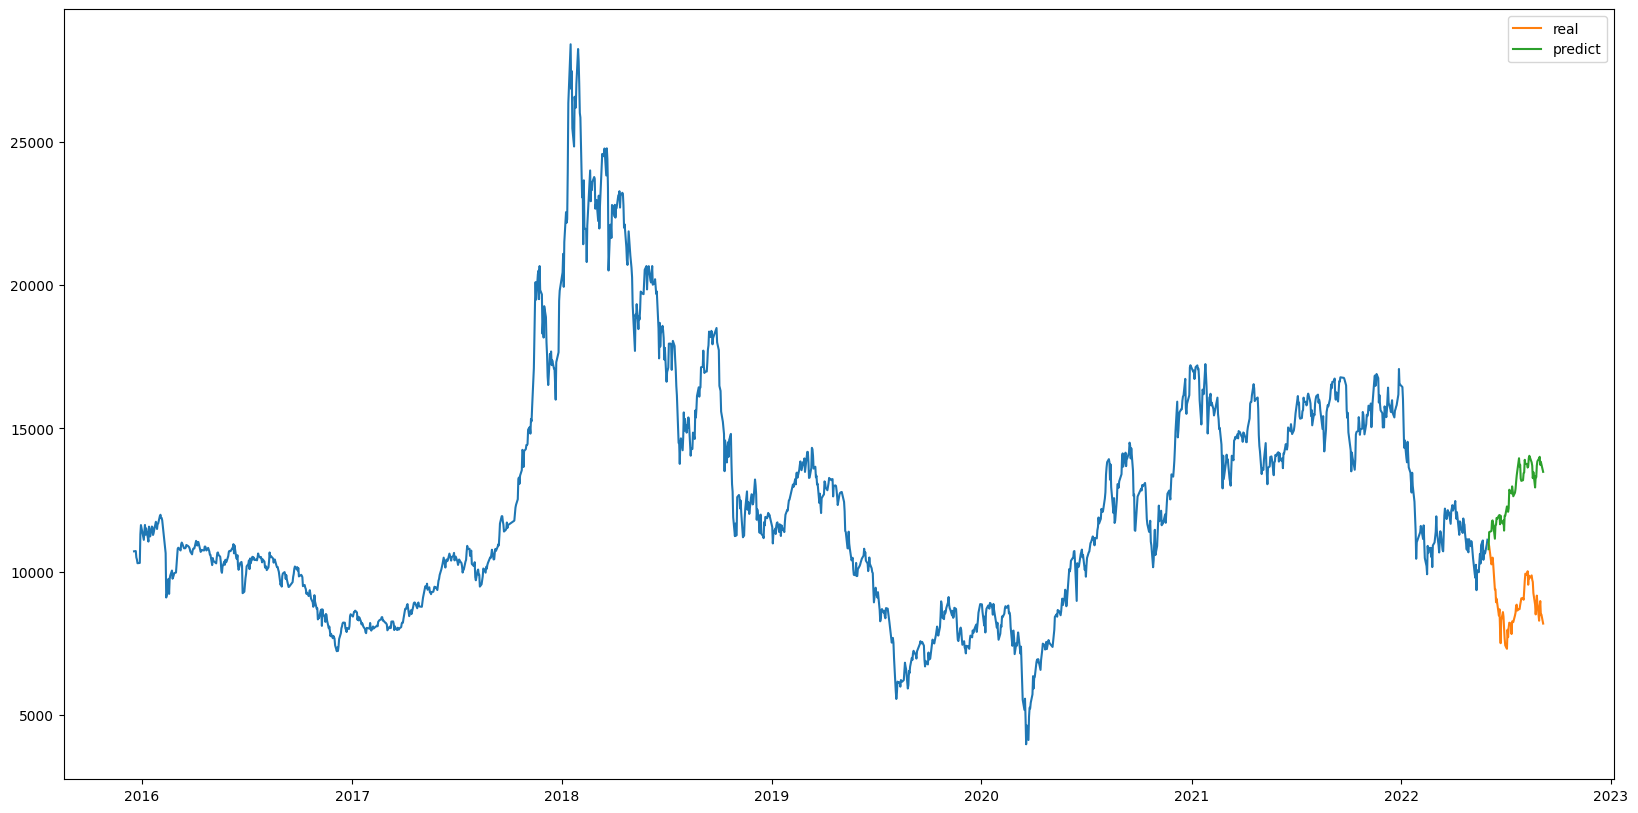

In [123]:
model = SARIMAX(train["y"], order=optimal[0][0][0], seasonal_order=optimal[0][0][1])
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(test.shape[0])

forecast = pd.DataFrame(forecast)
forecast.reset_index(drop=True, inplace=True)
forecast = pd.concat([test, forecast.reindex(test.index)], axis=1)
forecast

plt.figure(figsize=(20,10))
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'], test['y'], label="real")
plt.plot(forecast['ds'],forecast['predicted_mean'], label="predict")
plt.legend()
plt.show()